# Tri-Polar Grid Projected Plotting

This example demonstrates cell plots of data on the semi-structured ORCA2 model
grid.

First, the data is projected into the PlateCarree coordinate reference system.

Second four pcolormesh plots are created from this projected dataset,
using different projections for the output image.

In [ ]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import iris
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt

Load data

In [2]:
import iris

filepath = iris.sample_data_path('orca2_votemper.nc')
cube = iris.load_cube(filepath)
cube

<iris 'Cube' of sea_water_potential_temperature / (degC) (-- : 148; -- : 180)>

Set plot projections

In [4]:
import cartopy.crs as ccrs

projections = {}
projections['Mollweide'] = ccrs.Mollweide()
projections['PlateCarree'] = ccrs.PlateCarree()
projections['NorthPolarStereo'] = ccrs.NorthPolarStereo()
projections['Orthographic'] = ccrs.Orthographic(central_longitude=-90,
                                                central_latitude=45)
projections

{'Mollweide': <cartopy.crs.Mollweide at 0x7fcc26b26620>,
 'PlateCarree': <cartopy.crs.PlateCarree at 0x7fcc26b265c8>,
 'NorthPolarStereo': <cartopy.crs.NorthPolarStereo at 0x7fcc26b26410>,
 'Orthographic': <cartopy.crs.Orthographic at 0x7fcc26b263b8>}

Transform cube to target projection

In [7]:
import iris.analysis.cartography

new_cube, extent = iris.analysis.cartography.project(cube, projections['PlateCarree'],
                                                     nx=400, ny=200)
extent

[-180.0, 180.0, -90.0, 90.0]

In [8]:
new_cube

<iris 'Cube' of sea_water_potential_temperature / (degC) (projection_y_coordinate: 200; projection_x_coordinate: 400)>

Plot data in each projection

Here, the `axes` object returned from `plt.subplt` is used specifically with the `axes.set_global()` call to set the plot limits.  
Note that `subplot` is 1-based, so `i+1` has to be used: the first number is the number of rows in the grid, the second the number of columns, the last the plot number, in column-row order

['Mollweide', 'NorthPolarStereo', 'Orthographic', 'PlateCarree']

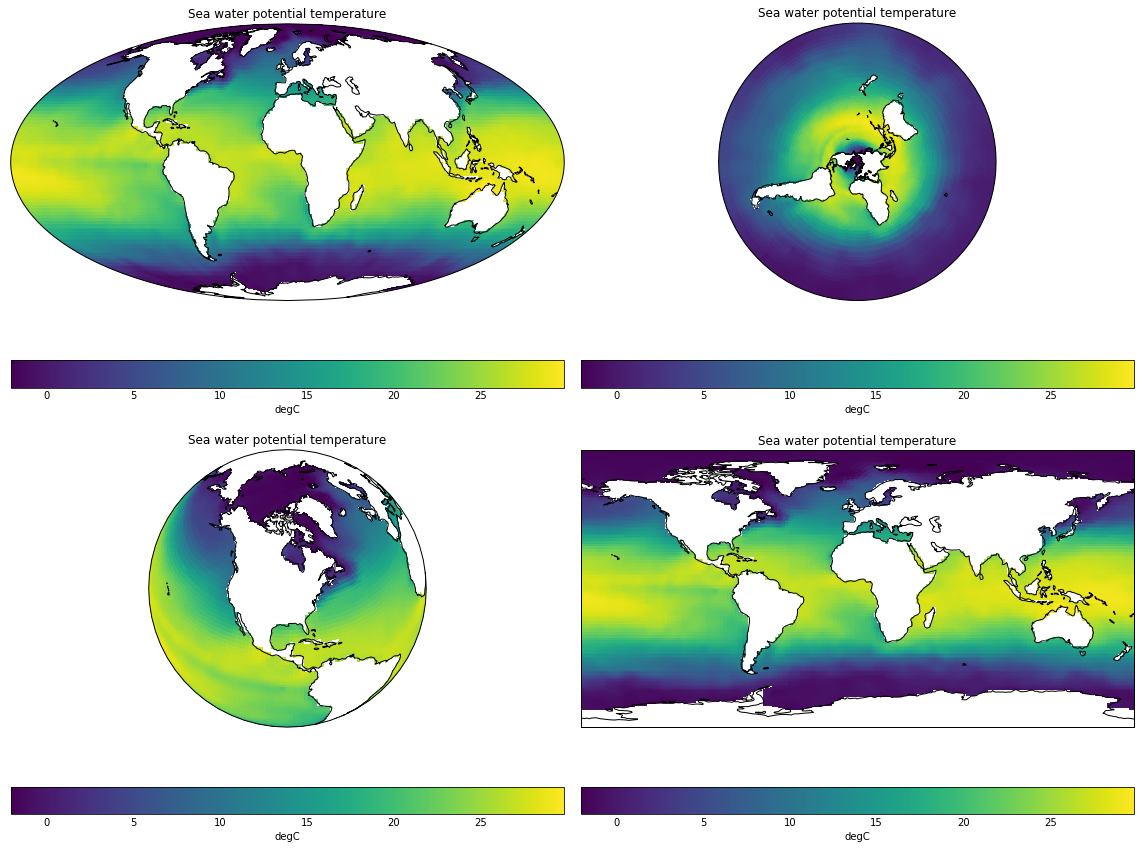

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import iris.plot as iplt
import iris.quickplot as qplt

rcParams['figure.figsize'] = [16, 12]

names = sorted(projections)
for i, name in enumerate(names):
    # Set up axes and title
    axes = plt.subplot(2, 2, i+1, projection=projections[name])
    
    # Set limits
    axes.set_global()

    qplt.pcolormesh(new_cube)
    axes.coastlines()
plt.tight_layout()
names